In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from tensorflow.keras.datasets import mnist

In [64]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

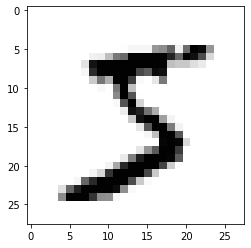

In [65]:
plt.imshow(X_train[0],cmap='Greys')

In [66]:
y_train[0]

5

In [67]:
from tensorflow.keras.utils import to_categorical

In [68]:
y_train.shape

(60000,)

In [71]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [72]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [73]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [74]:
X_train=X_train/250

In [75]:
X_test=X_test/250

In [78]:
#batch_size,height,width,color_channels
X_train=X_train.reshape(60000,28,28,1)

In [79]:
X_test=X_test.reshape(10000,28,28,1)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [87]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output MultiClass ==> SoftMax 
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [90]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.1399 - accuracy: 0.9576 - val_loss: 0.0638 - val_accuracy: 0.9805
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 3/10
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0484 - val_accuracy: 0.9848


In [99]:
accuracy=pd.DataFrame(model.history.history)[['accuracy','val_accuracy']]

In [104]:
losses=pd.DataFrame(model.history.history)[['loss','val_loss']]

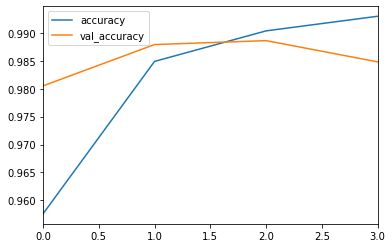

In [105]:
accuracy.plot()

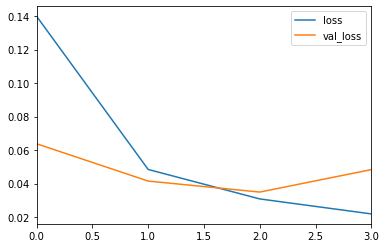

In [106]:
losses.plot()

In [109]:
model.metrics_names

['loss', 'accuracy']

In [111]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04837805893398035, 0.9848]

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
predictions=model.predict_classes(X_test)

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [115]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    0,    0,    0,    2,    0,    2,    0],
       [   3,    2, 1018,    0,    1,    0,    3,    3,    2,    0],
       [   2,    0,    5,  991,    0,    5,    1,    1,    5,    0],
       [   0,    1,    0,    0,  975,    0,    1,    0,    1,    4],
       [   2,    0,    0,    2,    0,  872,   13,    0,    2,    1],
       [   5,    2,    0,    0,    2,    1,  948,    0,    0,    0],
       [   0,    7,    9,    0,    2,    0,    0, 1006,    2,    2],
       [   7,    1,    2,    1,    0,    0,   12,    0,  948,    3],
       [   2,    3,    0,    0,   14,    1,    0,    4,    3,  982]],
      dtype=int64)

In [117]:
import seaborn as sns;

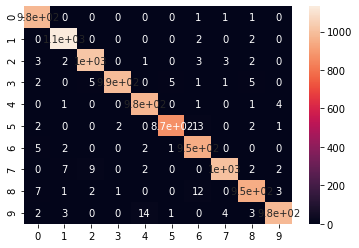

In [118]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [123]:
model.predict_classes(X_train[0].reshape(1,28,28,1))

array([5], dtype=int64)